In [ ]:
!pip install selenium


In [ ]:
!pip install beautifulsoup4 pandas lxml
!pip install selenium beautifulsoup4 pandas webdriver-manager

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

# --- Configure Chrome options ---
chrome_options = Options()
chrome_options.add_argument("--headless=new")            # ✅ headless mode (Chrome 109+)
chrome_options.add_argument("--no-sandbox")              # required in some systems
chrome_options.add_argument("--disable-dev-shm-usage")   # avoids memory issues
chrome_options.add_argument("--disable-gpu")             # optional, stabilizes headless
chrome_options.add_argument("--window-size=1920,1080")   # ensure full page rendering
chrome_options.add_argument("--disable-notifications")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-infobars")

# --- Initialize WebDriver ---
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# --- Open the pricing page ---
url = "https://www.inmotionhosting.com/pricing"
driver.get(url)

# --- Wait for dynamic content to load ---
time.sleep(5)

# --- Parse with BeautifulSoup ---
soup = BeautifulSoup(driver.page_source, "html.parser")

driver.quit()


<html lang="en-US">
 <head>
  <style data-hubspot-styled-components="">
  </style>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <link href="https://analytics.inmotionhosting.com" rel="preconnect"/>
  <link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect"/>
  <link crossorigin="" href="https://logx.optimizely.com" rel="preconnect"/>
  <link as="font" crossorigin="" href="https://www.inmotionhosting.com/wp-content/plugins/imh-helper/assets/fonts/imh-icons.woff2?bk26s6" rel="preload" type="font/woff2"/>
  <link crossorigin="anonymous" href="https://www.inmotionhosting.com/wp-content/themes/imh-responsive/favicon.png" rel="shortcut icon" type="image/png"/>
  <link crossorigin="anonymous" href="https://w
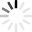

In [12]:
print(soup.prettify())

In [13]:
# Extract plan titles and prices
titles = [t.text.strip() for t in soup.find_all("h3", class_="imh-rostrum-card-title")]
prices = [p.text.strip() for p in soup.find_all("span", class_="rostrum-price")]

# --- Print results ---
# for t, p in zip(titles, prices):
#     print(f"{t}: {p}")

    # Extract text and store in a DataFrame
data = {
    'Plan Name': [t.text.strip() for t in titles],
    'Pricing': [p.text.strip() for p in prices]
}

df = pd.DataFrame(data)
print(df)

AttributeError: 'str' object has no attribute 'text'

In [ ]:
import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time

# url = "https://www.inmotionhosting.com/pricing"

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
# }

try:
    # response = requests.get(url, headers=headers)
    # response.raise_for_status()  # Raise an exception for bad status codes
    # soup = BeautifulSoup(response.content, 'lxml')

    # Assuming the structure and CSS selectors are consistent
    titles = soup.select("h3.imh-rostrum-card-title")
    prices = soup.select(".rostrum-price")

    # Extract text and store in a DataFrame
    data = {
        'Plan Name': [t.text.strip() for t in titles],
        'Pricing': [p.text.strip() for p in prices]
    }

    df = pd.DataFrame(data)

    # Display the DataFrame
    display(df)

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")